In [84]:
import os
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 데이터 확인

In [179]:
raw_data = pd.read_csv('./data/train_transaction.csv')
test = pd.read_csv('./data/test_transaction.csv')

In [166]:
test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3664544,18462411,39.839,C,6019,583.0,150.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,3664545,18462415,49.000,W,5556,483.0,150.0,mastercard,195.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,3664546,18462434,209.950,W,17188,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,3664547,18462438,209.950,W,18178,598.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
raw_data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,1.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,1.0,T,T,T,M0,F,F,F,F,F
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,1.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3086995,0,2005989,55.385,C,2256,545.0,185.0,visa,226.0,...,1.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
99996,3086996,0,2006074,117.000,W,2518,555.0,150.0,visa,226.0,...,2.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
99997,3086997,0,2006135,50.000,S,2748,111.0,150.0,visa,228.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,3086998,0,2006177,100.000,H,16075,514.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df = raw_data.copy()

In [169]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'M1', 'M2', 'M3',
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [6]:
# 불필요한 변수라 판단하여 삭제
df.drop(['TransactionID', 'TransactionDT'], axis = 1, inplace = True)

# EDA & 데이터 전처리

## 탐색

In [7]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,...,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,0,68.5,W,13926,NaN,150.0,discover,142.0,credit,NaN,...,1.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,0,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,gmail.com,...,1.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,0,59.0,W,4663,490.0,150.0,visa,166.0,debit,outlook.com,...,1.0,T,T,T,M0,F,F,F,F,F
3,0,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,yahoo.com,...,1.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,gmail.com,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 라벨 탐색 - 클래스 불균형


In [8]:
# 97.4%의 클래스 불균형을 가진다.
print(df['isFraud'].value_counts()), print(df['isFraud'].value_counts(normalize=True) * 100)

0    97439
1     2561
Name: isFraud, dtype: int64
0    97.439
1     2.561
Name: isFraud, dtype: float64


(None, None)

### 특징별 상태 공간 확인

In [9]:
for col in df.columns:
    print(f'---변수 : {col} ---------------------------------------------------------------------')
    print("타입: {}, 결측 개수: {}, 상태공간 크기: {}, 상태공간 일부: {}".format(df[col].dtype, df[col].isnull().sum(), len(df[col].unique()), df[col].unique()))

---변수 : isFraud ---------------------------------------------------------------------
타입: int64, 결측 개수: 0, 상태공간 크기: 2, 상태공간 일부: [0 1]
---변수 : TransactionAmt ---------------------------------------------------------------------
타입: float64, 결측 개수: 0, 상태공간 크기: 6387, 상태공간 일부: [ 68.5    29.     59.    ... 138.288 136.364  28.858]
---변수 : ProductCD ---------------------------------------------------------------------
타입: object, 결측 개수: 0, 상태공간 크기: 5, 상태공간 일부: ['W' 'H' 'C' 'S' 'R']
---변수 : card1 ---------------------------------------------------------------------
타입: int64, 결측 개수: 0, 상태공간 크기: 7677, 상태공간 일부: [13926  2755  4663 ... 14801  2055 12478]
---변수 : card2 ---------------------------------------------------------------------
타입: float64, 결측 개수: 1354, 상태공간 크기: 500, 상태공간 일부: [ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 3

### 범주형 변수 탐색

- ProductCD

In [10]:
df['ProductCD'].isnull().sum()

0

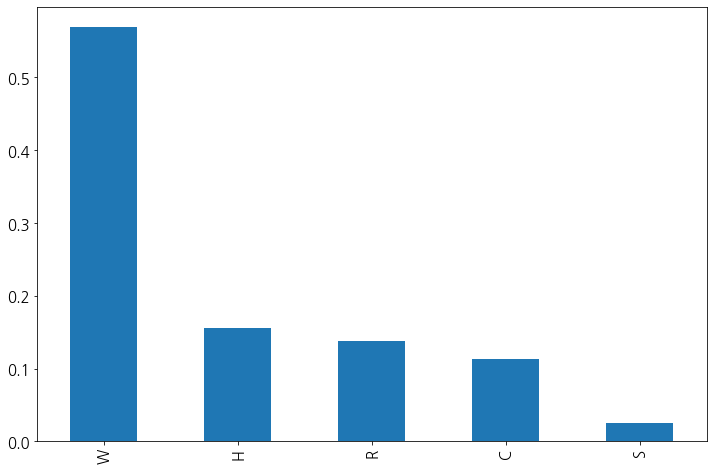

In [11]:
df['ProductCD'].value_counts(normalize=True).plot(kind='bar', fontsize=15)
plt.gcf().set_size_inches(12, 8)
plt.show()

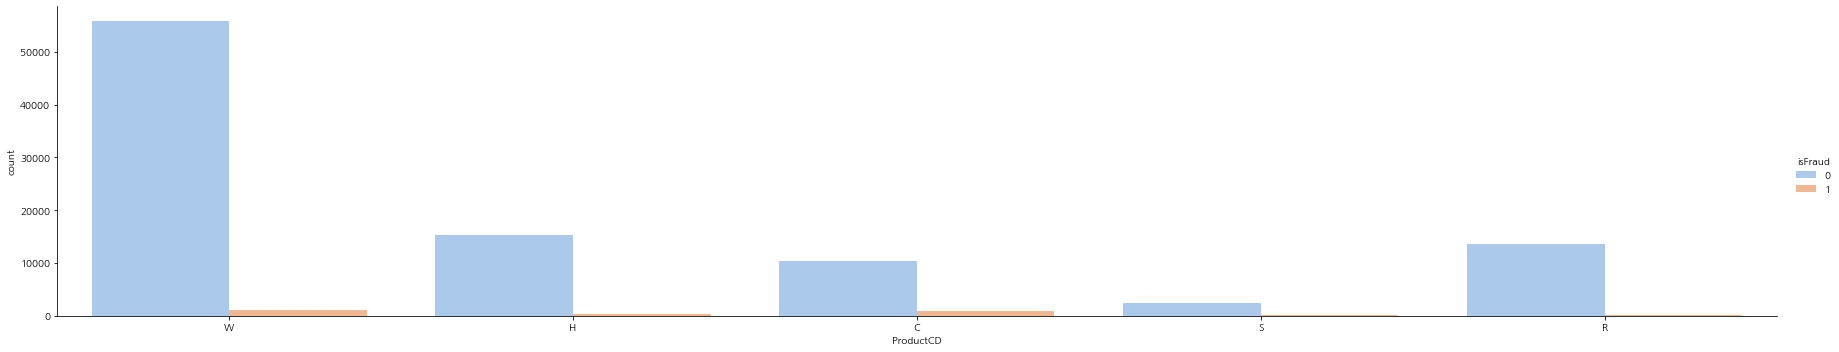

In [12]:
sns.catplot(data=df, x='ProductCD', hue='isFraud', kind='count', palette='pastel', aspect=5)
plt.show()

In [13]:
df.groupby('ProductCD')['isFraud'].mean().sort_values(ascending=False) * 100

ProductCD
C    8.783367
S    2.335709
H    1.977965
W    1.846056
R    1.078403
Name: isFraud, dtype: float64

- card4

In [14]:
df['card4'].isnull().sum()

7

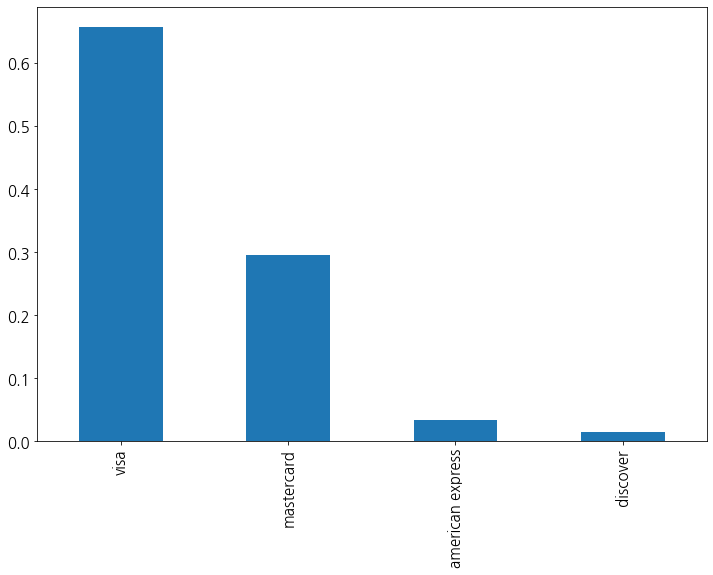

In [15]:
df['card4'].value_counts(normalize=True).plot(kind='bar', fontsize=15)
plt.gcf().set_size_inches(12, 8)
plt.show()

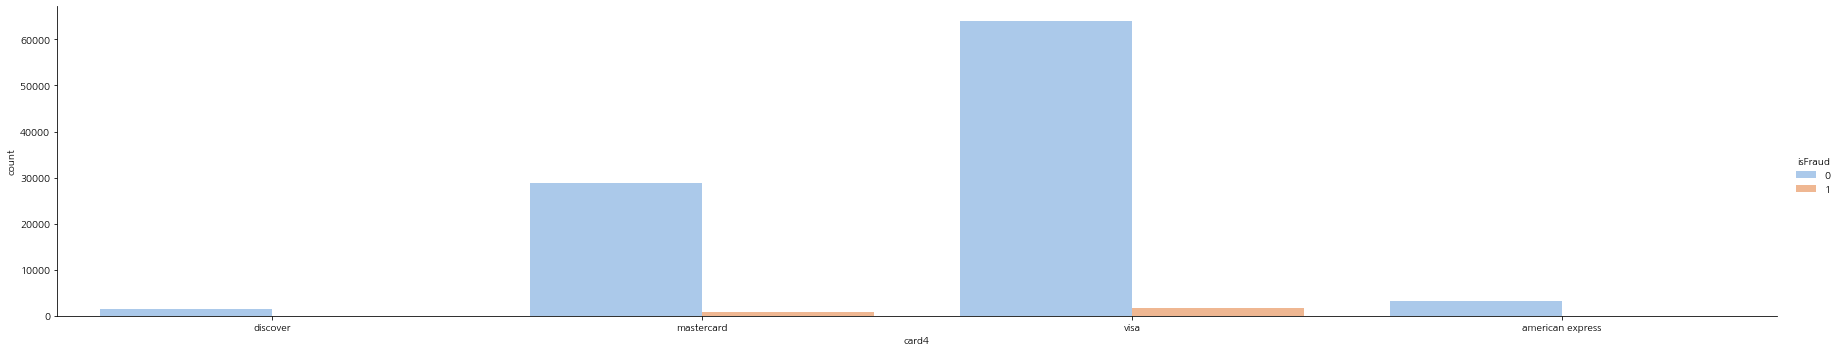

In [16]:
sns.catplot(data=df, x='card4', hue='isFraud', kind='count', palette='pastel', aspect=5)
plt.show()

In [17]:
df.groupby('card4')['isFraud'].mean().sort_values(ascending=False) * 100

card4
mastercard          2.881854
discover            2.530780
visa                2.486205
american express    1.141141
Name: isFraud, dtype: float64

- card6

In [18]:
df['card6'].isnull().sum()

4

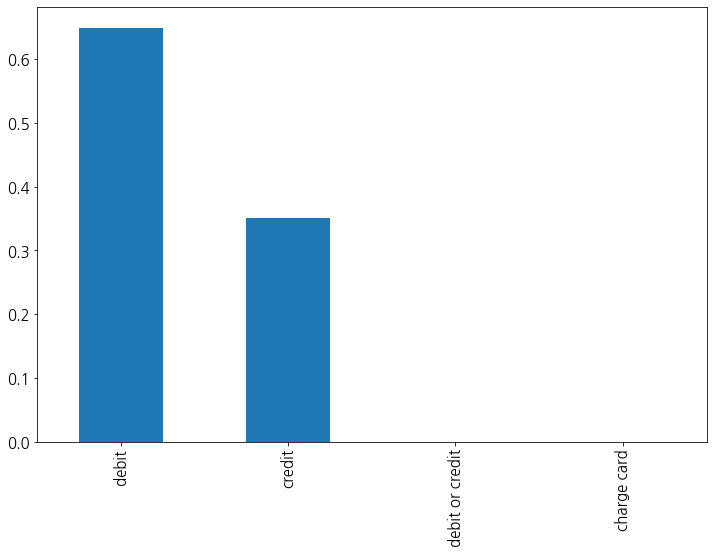

In [19]:
df['card6'].value_counts(normalize=True).plot(kind='bar', fontsize=15)
plt.gcf().set_size_inches(12, 8)
plt.show()

In [20]:
df.groupby('card6')['isFraud'].mean().sort_values(ascending=False) * 100

card6
credit             3.599236
debit              1.997751
charge card        0.000000
debit or credit    0.000000
Name: isFraud, dtype: float64

In [21]:
df['card6'].value_counts(normalize=False)

debit              64923
credit             35063
debit or credit        7
charge card            3
Name: card6, dtype: int64

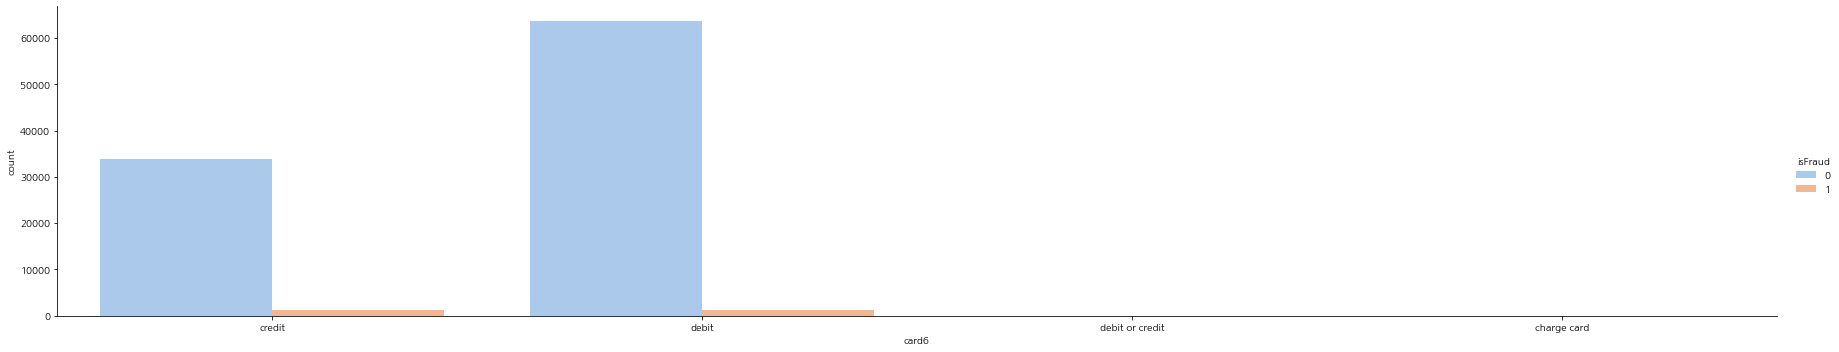

In [22]:
sns.catplot(data=df, x='card6', hue='isFraud', kind='count', palette='pastel', aspect=5)
plt.show()

- e-mail 관련

In [23]:
df['P_emaildomain'].value_counts()

gmail.com           36290
yahoo.com           15883
anonymous.com        8663
hotmail.com          8119
aol.com              4866
comcast.net          1856
icloud.com            894
msn.com               852
outlook.com           767
att.net               694
sbcglobal.net         671
verizon.net           626
live.com              501
bellsouth.net         440
cox.net               376
me.com                373
ymail.com             369
yahoo.com.mx          292
charter.net           233
optonline.net         212
live.com.mx           133
mac.com               122
rocketmail.com        110
earthlink.net          98
mail.com               76
embarqmail.com         70
roadrunner.com         68
juno.com               66
outlook.es             60
gmail                  60
twc.com                54
windstream.net         54
frontier.com           49
hotmail.es             47
frontiernet.net        42
netzero.com            41
q.com                  41
cfl.rr.com             39
web.de      

In [24]:
df['R_emaildomain'].value_counts()

gmail.com           13024
anonymous.com        6954
hotmail.com          5422
yahoo.com            3222
aol.com              1327
comcast.net           783
outlook.com           438
icloud.com            318
msn.com               308
yahoo.com.mx          291
verizon.net           260
sbcglobal.net         235
cox.net               214
bellsouth.net         185
me.com                184
live.com              173
att.net               162
live.com.mx           133
ymail.com              79
optonline.net          72
mac.com                66
outlook.es             59
hotmail.es             47
mail.com               42
charter.net            41
web.de                 38
prodigy.net.mx         36
hotmail.fr             32
earthlink.net          30
embarqmail.com         30
frontier.com           28
juno.com               26
yahoo.fr               24
windstream.net         22
gmx.de                 20
roadrunner.com         19
rocketmail.com         18
cfl.rr.com             18
q.com       

In [25]:
df['NA_P_emaildomain'] = df['P_emaildomain'].isnull().astype(int)
df['NA_R_emaildomain'] = df['R_emaildomain'].isnull().astype(int)

In [26]:
df.groupby('NA_P_emaildomain')['isFraud'].mean()

NA_P_emaildomain
0    0.026062
1    0.023127
Name: isFraud, dtype: float64

In [27]:
df.groupby('NA_R_emaildomain')['isFraud'].mean()

NA_R_emaildomain
0    0.041394
1    0.017279
Name: isFraud, dtype: float64

In [28]:
df['P_emaildomain'] = df['P_emaildomain'].str.split('.', expand=True).iloc[:, 0]
df['R_emaildomain'] = df['R_emaildomain'].str.split('.', expand=True).iloc[:, 0]

In [29]:
df.groupby('P_emaildomain')['isFraud'].mean().sort_values(ascending=False)

P_emaildomain
protonmail      0.125000
frontiernet     0.119048
mail            0.118421
outlook         0.064087
hotmail         0.045792
cableone        0.043478
icloud          0.035794
gmail           0.035213
aim             0.025641
ymail           0.021680
live            0.020440
me              0.018767
msn             0.016432
aol             0.014180
yahoo           0.013296
anonymous       0.010504
att             0.008646
comcast         0.008621
optonline       0.004717
charter         0.004292
verizon         0.003195
cox             0.002660
bellsouth       0.002273
sbcglobal       0.001490
cfl             0.000000
earthlink       0.000000
windstream      0.000000
web             0.000000
centurylink     0.000000
twc             0.000000
suddenlink      0.000000
servicios-ta    0.000000
sc              0.000000
rocketmail      0.000000
gmx             0.000000
roadrunner      0.000000
juno            0.000000
ptd             0.000000
embarqmail      0.000000
prodigy    

In [30]:
df.groupby('R_emaildomain')['isFraud'].mean().sort_values(ascending=False)

R_emaildomain
protonmail      0.500000
aim             0.125000
ymail           0.101266
mail            0.095238
outlook         0.092555
gmail           0.063430
hotmail         0.061695
icloud          0.044025
yahoo           0.026891
comcast         0.014049
anonymous       0.009491
cox             0.009346
aol             0.009043
live            0.003247
msn             0.003247
frontiernet     0.000000
gmx             0.000000
cableone        0.000000
windstream      0.000000
web             0.000000
verizon         0.000000
twc             0.000000
suddenlink      0.000000
servicios-ta    0.000000
scranton        0.000000
sc              0.000000
sbcglobal       0.000000
rocketmail      0.000000
roadrunner      0.000000
q               0.000000
ptd             0.000000
centurylink     0.000000
prodigy         0.000000
cfl             0.000000
optonline       0.000000
netzero         0.000000
bellsouth       0.000000
me              0.000000
charter         0.000000
mac        

In [31]:
df['same_emaildomain'] = (df['P_emaildomain'] == df['R_emaildomain']).astype(int)

df['same_emaildomain'].value_counts()

0    74862
1    25138
Name: same_emaildomain, dtype: int64

In [32]:
df.groupby('same_emaildomain')['isFraud'].mean().sort_values(ascending=False)

same_emaildomain
1    0.051715
0    0.016844
Name: isFraud, dtype: float64

- C3

In [33]:
df['C3'].isnull().sum()

0

In [34]:
df['C3'].value_counts(normalize=True)

0.0     0.98882
1.0     0.01042
2.0     0.00063
3.0     0.00009
8.0     0.00001
16.0    0.00001
4.0     0.00001
9.0     0.00001
Name: C3, dtype: float64

In [35]:
df['C3'].value_counts(normalize=False)

0.0     98882
1.0      1042
2.0        63
3.0         9
8.0         1
16.0        1
4.0         1
9.0         1
Name: C3, dtype: int64

In [36]:
df.groupby('C3')['isFraud'].mean().sort_values(ascending=False)

C3
0.0     0.025889
1.0     0.000960
2.0     0.000000
3.0     0.000000
4.0     0.000000
8.0     0.000000
9.0     0.000000
16.0    0.000000
Name: isFraud, dtype: float64

- M 관련

In [37]:
M_columns = ['M' + str(i) for i in range(1, 10)]

df[M_columns] = df[M_columns].fillna('결측')

In [38]:
for col in M_columns:
    print(df[col].value_counts(ascending=False))
    print()

결측    68553
T     31447
Name: M1, dtype: int64

결측    68553
T     28299
F      3148
Name: M2, dtype: int64

결측    68553
T     24600
F      6847
Name: M3, dtype: int64

결측    57670
M0    26211
M2     9410
M1     6709
Name: M4, dtype: int64

결측    68924
F     17198
T     13878
Name: M5, dtype: int64

결측    45587
F     29255
T     25158
Name: M6, dtype: int64

결측    83961
F     13777
T      2262
Name: M7, dtype: int64

결측    83961
F      9956
T      6083
Name: M8, dtype: int64

결측    83961
T     13744
F      2295
Name: M9, dtype: int64



In [39]:
for col in M_columns:
    print(df.groupby(col)['isFraud'].mean().sort_values(ascending=False))
    print()

M1
결측    0.029568
T     0.016981
Name: isFraud, dtype: float64

M2
F     0.033037
결측    0.029568
T     0.015195
Name: isFraud, dtype: float64

M3
결측    0.029568
F     0.028772
T     0.013699
Name: isFraud, dtype: float64

M4
M2    0.086929
M0    0.036168
M1    0.020122
결측    0.011444
Name: isFraud, dtype: float64

M5
T     0.042225
결측    0.023823
F     0.019363
Name: isFraud, dtype: float64

M6
결측    0.033606
F     0.024338
T     0.012600
Name: isFraud, dtype: float64

M7
결측    0.028049
F     0.013646
T     0.007958
Name: isFraud, dtype: float64

M8
결측    0.028049
F     0.014564
T     0.010028
Name: isFraud, dtype: float64

M9
결측    0.028049
F     0.015251
T     0.012442
Name: isFraud, dtype: float64



### 연속형 변수 탐색

- TransactionAmt

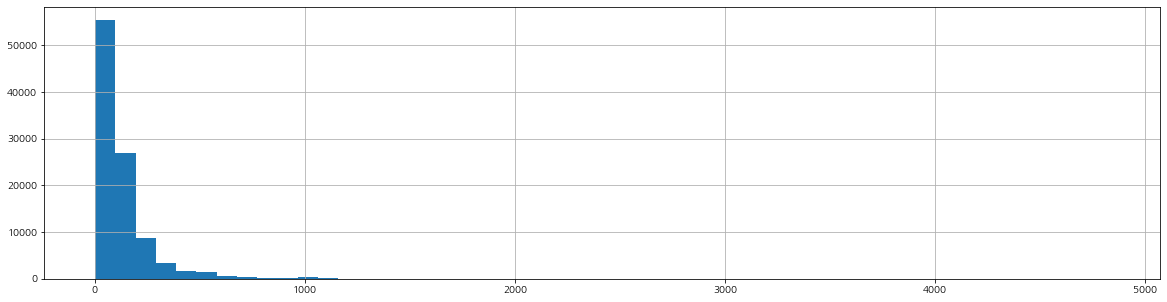

In [40]:
df['TransactionAmt'].hist(bins=50)
plt.gcf().set_size_inches(20, 5)
plt.show()

In [41]:
df['TransactionAmt'].describe()

count    100000.000000
mean        130.743351
std         206.024684
min           0.292000
25%          45.000000
50%          75.000000
75%         135.950000
max        4829.950000
Name: TransactionAmt, dtype: float64

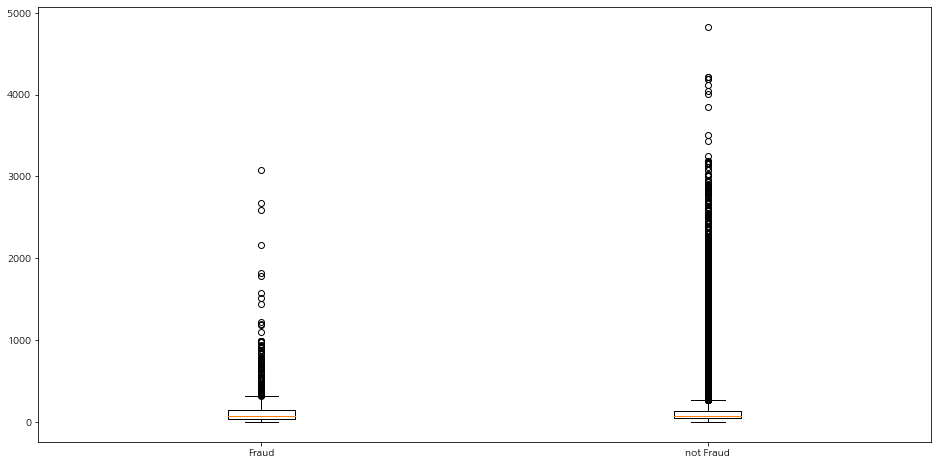

In [42]:
T_Fraud = df['TransactionAmt'].loc[df['isFraud']==1]
T_not_Fraud = df['TransactionAmt'].loc[df['isFraud']==0]

plt.figure(figsize=(16, 8))
plt.boxplot([T_Fraud, T_not_Fraud])
plt.xticks([1, 2], ['Fraud', 'not Fraud'])
plt.show()

In [43]:
# 사기 거래인 경우
T_Fraud.describe()

count    2561.000000
mean      133.760444
std       187.758261
min         0.292000
25%        40.000000
50%        78.788000
75%       150.000000
max      3081.970000
Name: TransactionAmt, dtype: float64

In [44]:
# 사기 거래가 아닌 경우
T_not_Fraud.describe()

count    97439.000000
mean       130.664052
std        206.483276
min          1.000000
25%         45.000000
50%         75.000000
75%        134.950000
max       4829.950000
Name: TransactionAmt, dtype: float64

- C 관련 변수 (C3 제외)

In [45]:
C_columns = ['C' + str(i) for i in range(1, 15) if i != 3]

df[C_columns].describe()

,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,40.124170,46.713820,18.716250,4.112040,22.679950,15.434690,25.487950,3.258130,26.058350,29.044750,21.616470,44.706040,16.666340
std,307.775832,358.771544,156.073536,21.341213,156.845929,149.238635,228.388267,13.968264,229.173387,215.376677,209.418212,218.392906,102.565647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,9.000000,2.000000
max,4685.000000,5691.000000,2253.000000,295.000000,2253.000000,2255.000000,3331.000000,194.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [46]:
# 중위값
df[C_columns].quantile(0.5)

C1     1.0
C2     1.0
C4     0.0
C5     0.0
C6     1.0
C7     0.0
C8     0.0
C9     1.0
C10    0.0
C11    1.0
C12    0.0
C13    2.0
C14    1.0
Name: 0.5, dtype: float64

In [47]:
# 75% 값
df[C_columns].quantile(0.75)

C1     2.0
C2     2.0
C4     1.0
C5     1.0
C6     2.0
C7     0.0
C8     1.0
C9     1.0
C10    1.0
C11    2.0
C12    0.0
C13    9.0
C14    2.0
Name: 0.75, dtype: float64

In [48]:
# 상위 90% 값
df[C_columns].quantile(0.9)

C1      6.0
C2      6.0
C4      1.0
C5      2.0
C6      4.0
C7      1.0
C8      1.0
C9      3.0
C10     1.0
C11     4.0
C12     1.0
C13    33.0
C14     5.0
Name: 0.9, dtype: float64

In [49]:
# 상위 99% 값
df[C_columns].quantile(0.99)

C1     1170.01
C2     1449.00
C4      803.01
C5      135.00
C6      812.00
C7      605.00
C8      878.01
C9       82.00
C10     993.00
C11     914.00
C12     832.00
C13     870.01
C14     564.00
Name: 0.99, dtype: float64

In [50]:
df[C_columns].skew()

C1     11.016779
C2     10.688921
C4     10.048503
C5      6.535082
C6      9.854040
C7     11.109404
C8     10.909698
C9      6.855618
C10    10.501298
C11    10.410700
C12    11.221594
C13     8.450164
C14     9.425972
dtype: float64

- card1, 2, 3, 5

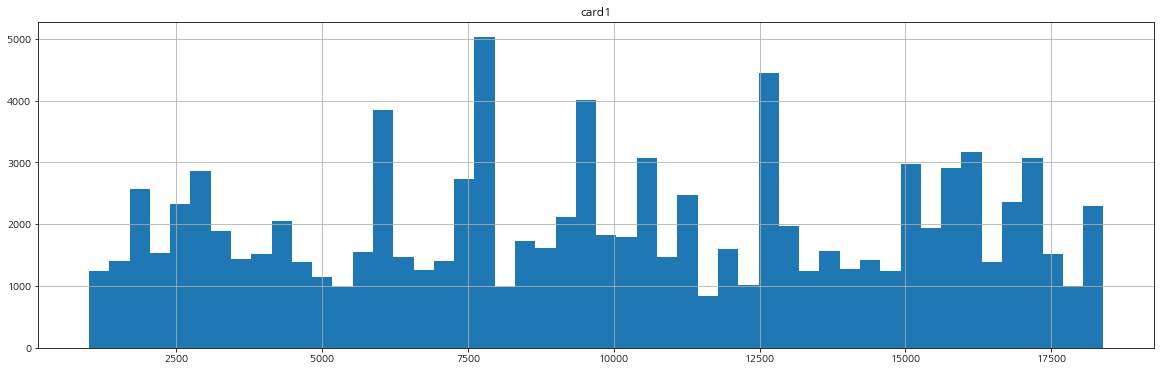

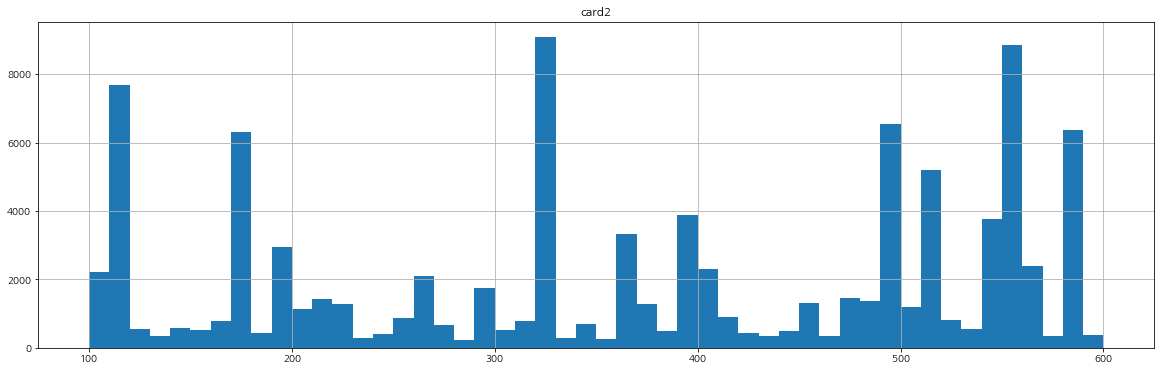

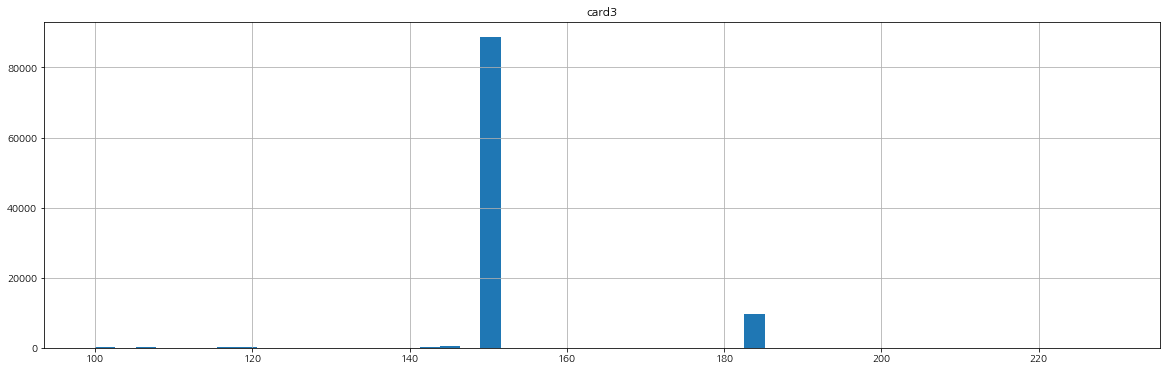

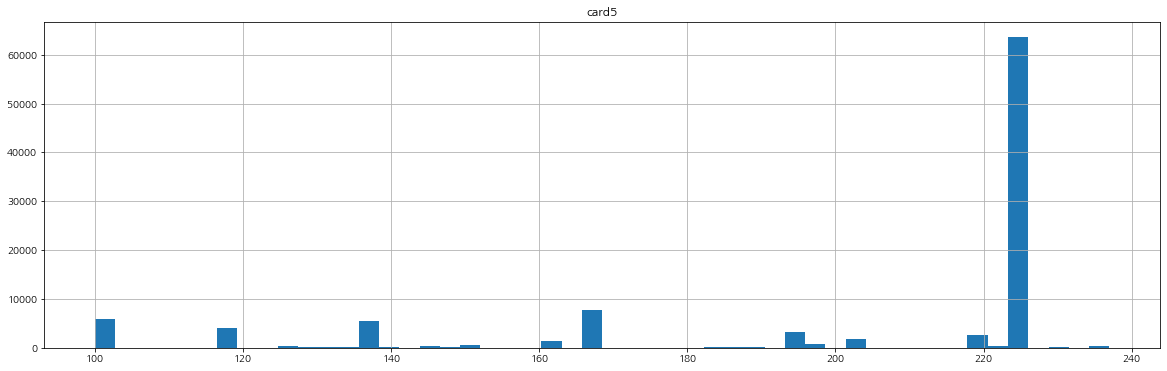

In [51]:
card_columns = ['card1', 'card2', 'card3', 'card5']

for col in card_columns:
    plt.figure(figsize=(20, 6))
    plt.title(col)
    df[col].hist(bins=50)
    plt.show()

In [52]:
df[card_columns].describe()

,card1,card2,card3,card5
count,100000.00000,98646.000000,99997.000000,99475.000000
mean,9878.39890,370.885976,153.236677,200.072300
std,4933.56307,159.244910,11.151527,40.905215
min,1001.00000,100.000000,100.000000,100.000000
25%,6019.00000,215.000000,150.000000,166.000000
50%,9653.00000,387.000000,150.000000,226.000000
75%,14290.00000,514.000000,150.000000,226.000000
max,18395.00000,600.000000,229.000000,237.000000


In [53]:
df['card3'].value_counts()

150.0    88642
185.0     9666
144.0      281
106.0      183
146.0      169
         ...  
206.0        1
208.0        1
193.0        1
225.0        1
199.0        1
Name: card3, Length: 74, dtype: int64

In [54]:
df['card3_150'] = (df['card3']==150).astype(int)
df['card3_185'] = (df['card3']==185).astype(int)

In [55]:
df.groupby('card3_150')['isFraud'].mean()

card3_150
0    0.086195
1    0.017847
Name: isFraud, dtype: float64

In [56]:
df.groupby('card3_185')['isFraud'].mean()

card3_185
0    0.017834
1    0.098283
Name: isFraud, dtype: float64

In [57]:
df['card5'].value_counts()

226.0    51346
224.0    12245
166.0     7677
102.0     5748
117.0     3579
         ...  
206.0        1
181.0        1
189.0        1
214.0        1
204.0        1
Name: card5, Length: 87, dtype: int64

In [58]:
df['card5_226'] = (df['card5']==226).astype(int)
df.groupby('card5_226')['isFraud'].mean()

card5_226
0    0.030522
1    0.020956
Name: isFraud, dtype: float64

## 전처리

### 범주형 변수 이진화

- card4

In [59]:
df['american_express'] = (df.loc[:, 'card4'] == 'american express').astype(int)
df.drop('card4', axis=1, inplace=True)

- card6

In [60]:
df['credits'] = (df.loc[:, 'card6'] == 'credit').astype(int)
df.drop('card6', axis=1, inplace=True)

- e-mail 관련 기존 변수 삭제(이미 이진화 완료)

In [66]:
df.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)

- C3

In [67]:
df['C3_over_1'] = (df['C3'] >= 1).astype(int)
df.drop('C3', axis=1, inplace=True)

### 결측치 대체

In [70]:
# 탐색 과정에서 결측치 대체
df[M_columns].isnull().sum(axis=1).sum()

0

### 더미화 수행 : OneHotCategoricalEncoder

In [71]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card5,C1,C2,C4,...,M9,NA_P_emaildomain,NA_R_emaildomain,same_emaildomain,card3_150,card3_185,card5_226,american_express,credits,C3_over_1
0,0,68.5,W,13926,NaN,150.0,142.0,1.0,1.0,0.0,...,결측,1,1,0,1,0,0,0,1,0
1,0,29.0,W,2755,404.0,150.0,102.0,1.0,1.0,0.0,...,결측,0,1,0,1,0,0,0,1,0
2,0,59.0,W,4663,490.0,150.0,166.0,1.0,1.0,0.0,...,F,0,1,0,1,0,0,0,0,0
3,0,50.0,W,18132,567.0,150.0,117.0,2.0,5.0,0.0,...,결측,0,1,0,1,0,0,0,0,0
4,0,50.0,H,4497,514.0,150.0,102.0,1.0,1.0,0.0,...,결측,0,1,0,1,0,0,0,1,0


In [ ]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder as OHE

dummy = OHE(variables=M_columns+['ProductCD'], drop_last=True).fit(df)
df = dummy.transform(df)

df.head()

### 치우침 해소

In [73]:
df['TransactionAmt'] = np.log(df['TransactionAmt'])

In [74]:
df['TransactionAmt'].skew()

0.36284771827868

### 연속형 변수를 이진화

In [77]:
df['card3'].value_counts(), df['card3_150'].value_counts(), df['card3_185'].value_counts()

(150.0    88642
 185.0     9666
 144.0      281
 106.0      183
 146.0      169
          ...  
 206.0        1
 208.0        1
 193.0        1
 225.0        1
 199.0        1
 Name: card3, Length: 74, dtype: int64,
 1    88642
 0    11358
 Name: card3_150, dtype: int64,
 0    90334
 1     9666
 Name: card3_185, dtype: int64)

In [79]:
df['card5'].value_counts(), df['card5_226'].value_counts()

(226.0    51346
 224.0    12245
 166.0     7677
 102.0     5748
 117.0     3579
          ...  
 206.0        1
 181.0        1
 189.0        1
 214.0        1
 204.0        1
 Name: card5, Length: 87, dtype: int64,
 1    51346
 0    48654
 Name: card5_226, dtype: int64)

In [80]:
df.drop(['card3', 'card5'], axis=1, inplace=True)

### 특정값 기준 결측치 대체

In [81]:
from sklearn.impute import SimpleImputer as SI

In [82]:
df.head()

,isFraud,TransactionAmt,card1,card2,C1,C2,C4,C5,C6,C7,...,M7_결측,M7_F,M8_결측,M8_F,M9_결측,M9_F,ProductCD_W,ProductCD_H,ProductCD_C,ProductCD_S
0,0,4.226834,13926,NaN,1.0,1.0,0.0,0.0,1.0,0.0,...,1,0,1,0,1,0,1,0,0,0
1,0,3.367296,2755,404.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1,0,1,0,1,0,1,0,0,0
2,0,4.077537,4663,490.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,1,0,1,1,0,0,0
3,0,3.912023,18132,567.0,2.0,5.0,0.0,0.0,4.0,0.0,...,1,0,1,0,1,0,1,0,0,0
4,0,3.912023,4497,514.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1,0,1,0,1,0,0,1,0,0


In [83]:
imputer = SI().fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

df.head()

,isFraud,TransactionAmt,card1,card2,C1,C2,C4,C5,C6,C7,...,M7_결측,M7_F,M8_결측,M8_F,M9_결측,M9_F,ProductCD_W,ProductCD_H,ProductCD_C,ProductCD_S
0,0.0,4.226834,13926.0,370.885976,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,3.367296,2755.0,404.000000,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,4.077537,4663.0,490.000000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,3.912023,18132.0,567.000000,2.0,5.0,0.0,0.0,4.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,3.912023,4497.0,514.000000,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# modeling

## model 학습


In [105]:
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGB
from imblearn.under_sampling import NearMiss
from sklearn.metrics import *

In [87]:
X = df.drop('isFraud', axis=1)
Y = df[['isFraud']]

In [89]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((75000, 47), (75000, 1), (25000, 47), (25000, 1))

In [97]:
train_y = train_y.astype(int)
test_y = test_y.astype(int)

In [90]:
# 기본 하이퍼 파라미터 튜닝
RFC_grid = dict({
                'n_estimators':[100, 200],
                'max_depth':[3, 5, 7, 10]
})
XGB_grid = dict({
                'n_estimators':[100, 200],
                'max_depth':[3, 5, 7, 10],
                'learning_rate':[0.05, 0.1, 0.2]
})

- 클래스 불균형 확인

In [119]:
class_imbalance_ratio = np.sum(train_y==0) / np.sum(train_y==1)
class_imbalance_ratio

isFraud    38.042166
dtype: float64

In [104]:
# 언더 샘플링을 하지 않은
RFC_cs_grid = copy.copy(RFC_grid)
XGB_cs_grid = copy.copy(XGB_grid)

RFC_cs_grid['class_weight'] = [{1:class_imbalance_ratio * w, 0:1} for w in [1, 0.9, 0.7, 0.5]]
XGB_cs_grid['class_weight'] = [{1:class_imbalance_ratio * w, 0:1} for w in [1, 0.9, 0.7, 0.5]]

In [106]:
# 파라미터 변환
RFC_cs_grid = ParameterGrid(RFC_cs_grid)
XGB_cs_grid = ParameterGrid(XGB_cs_grid)

RFC_grid = ParameterGrid(RFC_grid)
XGB_grid = ParameterGrid(XGB_grid)

In [108]:
grid_for_cs_model = {RFC:RFC_cs_grid, XGB:XGB_cs_grid}
grid_for_not_cs_model = {RFC:RFC_grid, XGB:XGB_grid}

In [128]:
# f1 평가지표 함수
def model_test(model, test_x, test_y):
    pred = model.predict(test_x)
    return f1_score(test_y, pred)

In [111]:
train_x.shape[1]

47

- 하이퍼 파라미터 튜닝 : 일반 모델

In [112]:
max_iter = 0
for k in range(train_x.shape[1], 6, -5):
    for m in grid_for_cs_model:
        for p in grid_for_cs_model[m]:
            max_iter += 1
print(max_iter)

1152


In [113]:
# 언더 샘플링을 한 경우와 아닌 경우의 꼬임 방지
tr_x = train_x.copy()
te_x = test_x.copy()

In [115]:
num_iter = 0
best_score = -1

for k in range(train_x.shape[1], 6, -5):
    selector = SelectKBest(mutual_info_classif, k = k).fit(tr_x, train_y)
    seleced_columns = tr_x.columns[selector.get_support()]

    tr_x = tr_x[seleced_columns]
    te_x = te_x[seleced_columns]

    for func in grid_for_cs_model:
        for p in grid_for_not_cs_model[func]:
            model = func(**p).fit(tr_x, train_y)
            score = model_test(model=model, test_x=te_x, test_y=test_y)

            if score > best_score:
                best_model = model
                best_features = seleced_columns
                best_score = score
            
            num_iter += 1

            print(f'{num_iter}/{max_iter}, best score : {best_score}')

1/1152, best score : 0.0
2/1152, best score : 0.0
3/1152, best score : 0.19444444444444445
4/1152, best score : 0.19694868238557556
5/1152, best score : 0.27814569536423833
6/1152, best score : 0.27814569536423833
7/1152, best score : 0.38902743142144636
8/1152, best score : 0.3940149625935162
[23:27:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
9/1152, best score : 0.3940149625935162
[23:27:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
10/1152, best score : 0.3940149625935162
[23:27:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

In [116]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
best_features

Index(['TransactionAmt', 'card1', 'card2', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'NA_P_emaildomain',
       'NA_R_emaildomain', 'same_emaildomain', 'card3_150', 'card3_185',
       'card5_226', 'american_express', 'credits', 'C3_over_1', 'M1_T', 'M2_T',
       'M2_결측', 'M3_T', 'M3_결측', 'M4_M2', 'M4_M0', 'M4_결측', 'M5_F', 'M5_T',
       'M6_T', 'M6_F', 'M7_결측', 'M7_F', 'M8_결측', 'M8_F', 'M9_결측', 'M9_F',
       'ProductCD_W', 'ProductCD_H', 'ProductCD_C', 'ProductCD_S'],
      dtype='object')

- 하이퍼 파라미터 튜닝 : 언더 샘플링 모델(best score 유지)

In [123]:
max_iter = 0
for w in [1, 0.9, 0.7, 0.5]:
    for k in range(train_x.shape[1], 6, -5):
        for func in grid_for_not_cs_model:
            for p in grid_for_not_cs_model[func]:
                max_iter += 1
print(max_iter)

1152


In [130]:
num_iter = 0
for w in [1, 0.9, 0.7, 0.5]:
    # 언더 샘플링으로 인한꼬임 방지
    tr_x = train_x.copy()
    te_x = test_x.copy()

    NM_model = NearMiss(version=2, sampling_strategy={
                                                    1:train_y.value_counts().iloc[-1],
                                                    0:int(train_y.value_counts().iloc[-1] * w * class_imbalance_ratio)
    })

    u_tr_x, u_tr_y = NM_model.fit_resample(tr_x, train_y)
    u_tr_x = pd.DataFrame(u_tr_x, columns=tr_x.columns)

    for k in range(train_x.shape[1], 6, -5):
        selector = SelectKBest(mutual_info_classif, k=k).fit(u_tr_x, u_tr_y)
        seleced_columns = u_tr_x.columns[selector.get_support()]
        u_tr_x = u_tr_x[seleced_columns]
        te_x = te_x[seleced_columns]

        for func in grid_for_not_cs_model:
            for p in grid_for_not_cs_model[func]:
                model = func(**p).fit(u_tr_x, u_tr_y)
                score = model_test(model=model, test_x=te_x, test_y=test_y)

                if score > best_score:
                    best_model = model
                    best_features = seleced_columns
                    best_score = score
                num_iter += 1

                print(f'{num_iter}/{max_iter} best score : {best_score}')

1/1152 best score : 0.7279620853080568
2/1152 best score : 0.7279620853080568
3/1152 best score : 0.7279620853080568
4/1152 best score : 0.7279620853080568
5/1152 best score : 0.7279620853080568
6/1152 best score : 0.7279620853080568
7/1152 best score : 0.7279620853080568
8/1152 best score : 0.7279620853080568
[00:42:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
9/1152 best score : 0.7279620853080568
[00:42:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
10/1152 best score : 0.7279620853080568
[00:42:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used

In [131]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
best_features

Index(['TransactionAmt', 'card1', 'card2', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'NA_P_emaildomain',
       'NA_R_emaildomain', 'same_emaildomain', 'card3_150', 'card3_185',
       'card5_226', 'american_express', 'credits', 'C3_over_1', 'M1_T', 'M2_T',
       'M2_결측', 'M3_T', 'M3_결측', 'M4_M2', 'M4_M0', 'M4_결측', 'M5_F', 'M5_T',
       'M6_T', 'M6_F', 'M7_결측', 'M7_F', 'M8_결측', 'M8_F', 'M9_결측', 'M9_F',
       'ProductCD_W', 'ProductCD_H', 'ProductCD_C', 'ProductCD_S'],
      dtype='object')

In [133]:
best_score

0.7279620853080568

## model 적용

In [134]:
model = best_model
features = best_features

In [135]:
test_df = pd.read_csv('./data/test_transaction.csv')
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
raw_data.drop('isFraud', axis=1, inplace=True)
test_df = test_df[raw_data.columns]

In [136]:
def get_feature_importances(model, data):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = data.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    sns.barplot(x=ftr_top20, y=ftr_top20.index)
    plt.rc('xtick', labelsize=5)
    plt.show()

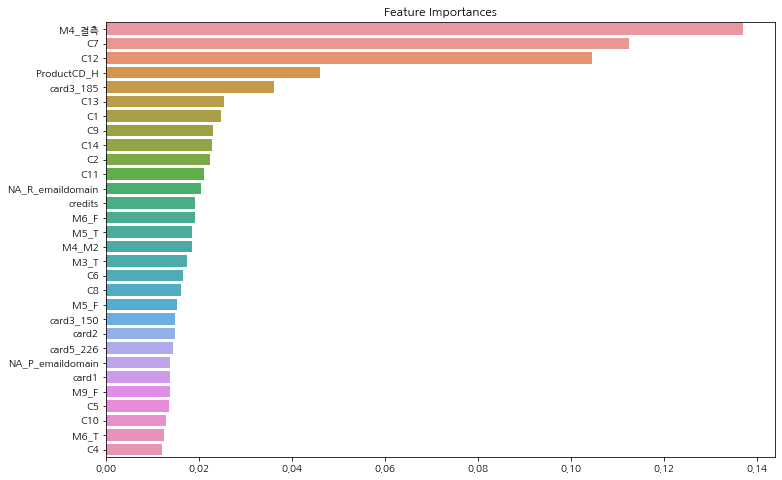

In [137]:
get_feature_importances(model=model, data=train_x)

In [ ]:
def pipeline(input_data, dummy_model, imputer, features, model):
    input_data_copy = input_data.copy()
    input_data_copy.drop(['TransactionID', 'TransactionDT'], axis = 1, inplace = True)
    
    # 범주형 변수: 이진화 및 파생 변수 생성
    input_data_copy['american_express'] = (input_data_copy.loc[:, 'card4'] == 'american express').astype(int)
    input_data_copy.drop('card4', axis = 1, inplace = True)

    input_data_copy['credit'] = (input_data_copy.loc[:, 'card6'] == 'credit').astype(int)
    input_data_copy.drop('card6', axis = 1, inplace = True)    
        
    input_data_copy['NA_R_emaildomain'] = (input_data_copy['R_emaildomain'].isnull()).astype(int)
    input_data_copy['same_emaildomain'] = (input_data_copy['P_emaildomain'] == input_data_copy['R_emaildomain']).astype(int)
    input_data_copy.drop(['P_emaildomain', 'R_emaildomain'], axis = 1, inplace = True)    
    input_data_copy['C3_over_1'] = (input_data_copy['C3'] >= 1).astype(int)
    input_data_copy.drop(['C3'], axis = 1, inplace = True)
    
    M_columns = ['M' + str(i) for i in range(1, 10)]    
    input_data_copy[M_columns] = input_data_copy[M_columns].fillna("결측")
    input_data_copy = dummy_model.transform(input_data_copy)  
    
    # 연속형 변수 처리
    input_data_copy['TransactionAmt'] = np.log(input_data_copy['TransactionAmt'])    
    
    input_data_copy['card3_150'] = (input_data_copy['card3'] == 150).astype(int)
    input_data_copy['card3_185'] = (input_data_copy['card3'] == 185).astype(int)
    input_data_copy['card5_226'] = (input_data_copy['card5'] == 226).astype(int) 
    input_data_copy.drop(['card3', 'card5'], axis = 1, inplace = True)
    
    input_data_copy = pd.DataFrame(imputer.transform(Train_X), columns = input_data_copy.columns)
    input_data_copy = input_data_copy[features]
    
    return model.predict(input_data_copy)